In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename='galadriel_dataset_24_05_09.h5'
df_input=pd.read_hdf(filename,'df_input')
df_time=pd.read_hdf(filename,'df_time')
df_freq_int=pd.read_hdf(filename,'df_freq_int')

#get the arrays and print them
print('Input DF')
print(df_input)

print('----')
print('Time values')
df_time_val=df_time.loc[0]
print(df_time_val)

print('----')
print("Intensity")
df_time= df_time.drop([0]) #drop the time values
df_time.reset_index(inplace=True,drop=True) #to start again from 0 (as the other DataFrames)
#df_time = df_time.drop('index', axis=1)
print(df_time)

print('----')
print("Freq values")
df_freq_val=df_freq_int.loc[0]
print(df_freq_val)

print('----')
print("Frequency intesity")
df_freq_int= df_freq_int.drop([0]) #drop the freq values
df_freq_int.reset_index(inplace=True,drop=True)
#df_freq_int = df_freq_int.drop('index', axis=1)
print(df_freq_int)

Input DF
       shot number  order2  order3     order4
0            53143   34900  -17000 -4600000.0
1            53144   34900  -17000 -4600000.0
2            53146   34900  -17000 -4500000.0
3            53147   34900  -17000 -4500000.0
4            53149   34900  -17000 -4400000.0
...            ...     ...     ...        ...
10335        68647   35400   29000 -3800000.0
10336        68648   35400   29000 -3800000.0
10337        68650   35400   29000 -3700000.0
10338        68651   35400   29000 -3700000.0
10339        68653   35400   29000 -3600000.0

[10340 rows x 4 columns]
----
Time values
0    -83.969782
1    -73.473559
2    -62.977336
3    -52.481114
4    -41.984891
5    -31.488668
6    -20.992445
7    -10.496223
8      0.000000
9     10.496223
10    20.992445
11    31.488668
12    41.984891
13    52.481114
14    62.977336
15    73.473559
16    83.969782
Name: 0, dtype: float64
----
Intensity
             0         1         2         3         4         5         6   \
0     

In [3]:
print(df_input.tail(10))

       shot number  order2  order3     order4
10330        68639   35400   29000 -4100000.0
10331        68641   35400   29000 -4000000.0
10332        68642   35400   29000 -4000000.0
10333        68644   35400   29000 -3900000.0
10334        68645   35400   29000 -3900000.0
10335        68647   35400   29000 -3800000.0
10336        68648   35400   29000 -3800000.0
10337        68650   35400   29000 -3700000.0
10338        68651   35400   29000 -3700000.0
10339        68653   35400   29000 -3600000.0


In [4]:
df_input.describe()

,shot number,order2,order3,order4
count,10340.000000,10340.000000,10340.000000,1.034000e+04
mean,60897.900484,35149.980658,5998.259188,-4.100068e+06
std,4478.191374,158.139878,13567.112483,2.915866e+05
min,53143.000000,34900.000000,-17000.000000,-4.600000e+06
25%,57019.750000,35000.000000,-6000.000000,-4.400000e+06
50%,60898.500000,35150.000000,6000.000000,-4.100000e+06
75%,64775.500000,35300.000000,18000.000000,-3.875000e+06
max,68653.000000,35400.000000,29000.000000,-3.600000e+06


Text(0.5, 1.0, 'Frequency')

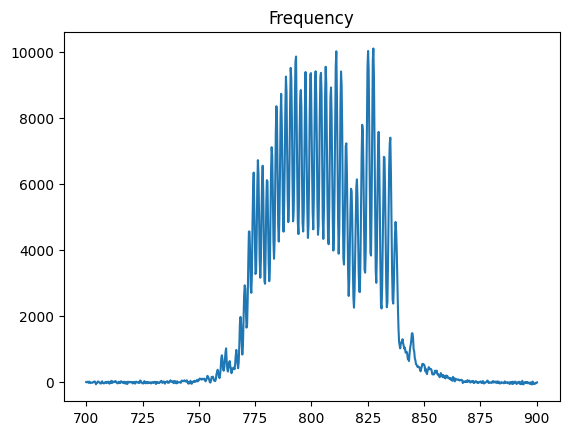

In [5]:
#plot a random shot
plt.plot(df_freq_val,df_freq_int.loc[500])
#plt.plot(df_freq_val)
plt.title('Frequency')

Text(0.5, 1.0, 'Pulse shape')

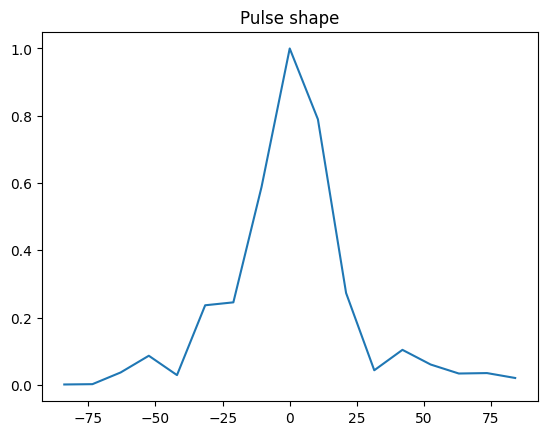

In [6]:
plt.plot(df_time_val,df_time.loc[500])
plt.title('Pulse shape')

## Check for extreme values in the raw data

In [7]:
#look for bad datapoints in the raw data
maxval_freq=df_freq_int.max(axis=1)
#for i,v in maxval_freq.items():
#    if(v<8000 or v>65000):
#        print(i,v)

Text(0, 0.5, 'Num. shots')

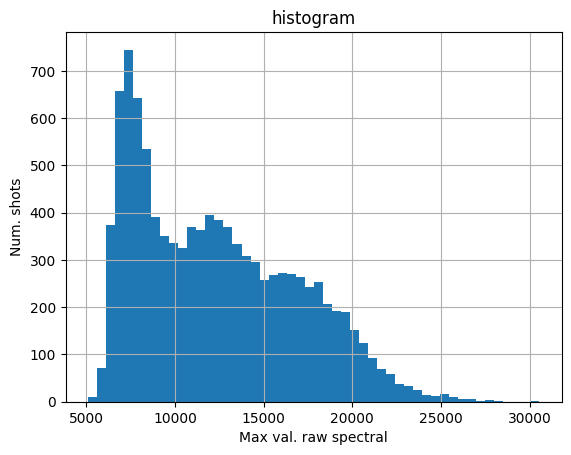

In [8]:
maxval_freq.hist(bins=50)
plt.title('histogram')
plt.xlabel('Max val. raw spectral')
plt.ylabel('Num. shots')

## Variance analysis

In [9]:
#The function calculates the variance from the shots with the same input parameters and store it in a DF with SAME size (so there is redundant data)
#dup_shots should be the maximum number of duplicate shots (-1) but is OK if higher (but slower algorithm)

def get_var(df_input,df_time,dup_shots):
    list_aux=[]
    for index,row in df_input.iterrows():
        o2=row['order2']
        o3=row['order3']
        o4=row['order4']
        #check if the previous and following rows were the same
        time_list=[]
        for i in range(index-dup_shots,index+dup_shots+1):
            if (i>=0 and i<=len(df_input)-1):
                #print(index,dup_shots,i)
                df_aux=df_input.iloc[i] #row to check
                if (df_aux['order2']==o2 and df_aux['order3']==o3 and df_aux['order4']==o4):
                    time_list.append(df_time.iloc[i].to_list()) #store the rows with same parameters in a list
        time_list=np.array(time_list)
        time_list=np.var(time_list,axis=0)
        list_aux.append(time_list)
            
    #create the dataframe from the list
    df_time_var=pd.DataFrame(list_aux)
    #print(df_time)
    #print(df_time_var)
    return df_time_var

In [12]:
dup_shots=2 #max number of duplicate shots -1
df_time_var = get_var(df_input,df_time,dup_shots)
df_time_var_sum=df_time_var.sum(axis=1)

Text(0.5, 1.0, 'Histogram      (total num. shots=10340)')

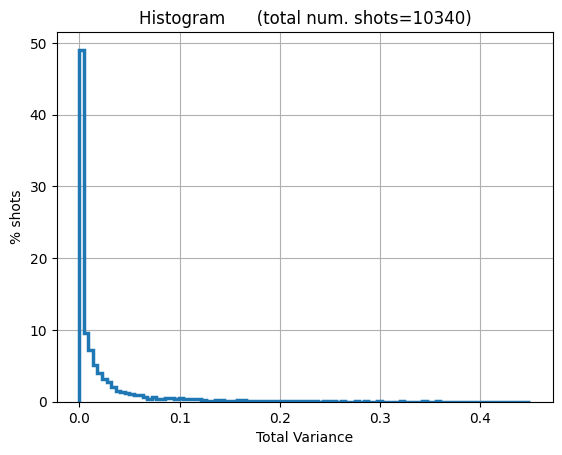

In [13]:
weights_time = 100*np.ones_like(df_time_var_sum) / len(df_time_var_sum)
df_time_var_sum.hist(bins=100,weights=weights_time,histtype="step",linewidth=2.5)
plt.ylabel('% shots')
plt.xlabel('Total Variance')
plt.title('Histogram      (total num. shots='+str(len(df_time_var_sum))+')')

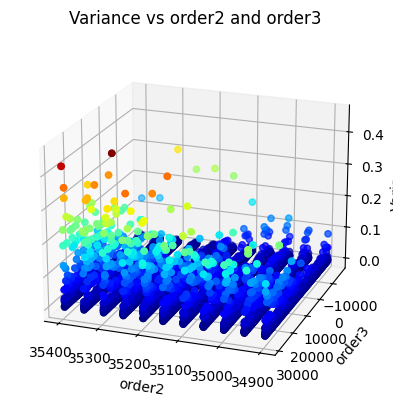

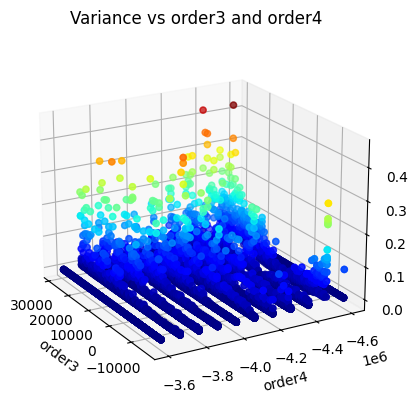

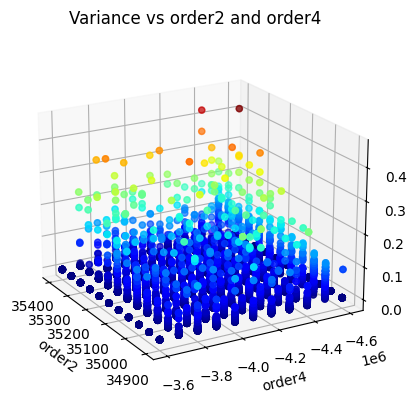

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_input['order2'], df_input['order3'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax.set_xlabel('order2')
ax.set_ylabel('order3')
ax.set_zlabel('Variance')
ax.view_init(elev=20., azim=110)
plt.title('Variance vs order2 and order3')
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')
ax2.scatter(df_input['order3'], df_input['order4'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax2.set_xlabel('order3')
ax2.set_ylabel('order4')
ax2.set_zlabel('Variance')
ax2.view_init(elev=20., azim=150)
plt.title('Variance vs order3 and order4')
plt.show()

fig = plt.figure()
ax3 = fig.add_subplot(projection='3d')
ax3.scatter(df_input['order2'], df_input['order4'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax3.set_xlabel('order2')
ax3.set_ylabel('order4')
ax3.set_zlabel('Variance')
ax3.view_init(elev=20., azim=150)
plt.title('Variance vs order2 and order4')
plt.show()